In [136]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style('whitegrid')

from acs import ACSDataSource, ACSIncome
from sklearn.linear_model import LogisticRegression

import plotly.graph_objects as gp

# Link to dataset: https://www2.census.gov/programs-surveys/acs/data/pums/

In [2]:
state_list = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI',
              'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI',
              'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC',
              'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
              'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'PR']

In [3]:
features=['AGEP','COW','SCHL','MAR','OCCP','POBP','RELP','WKHP','SEX','RAC1P','PINCP']
features_no_relp=['AGEP','COW','SCHL','MAR','OCCP','POBP','WKHP','SEX','RAC1P','PINCP']

## 1. Plot the population pyramid for one state over years

### Sex

In [12]:
#Download dataset
for year in range(2007,2020):
    data_source = ACSDataSource(survey_year=year, horizon='1-Year', survey='person')
    ca_data = data_source.get_data(states=["CA"], download=True)
    if 'RELP' in ca_data.columns:
        df = ca_data[features]
    else:
        df = ca_data[features_no_relp]
    file = 'ACS-PUMS-'+str(year) + ".csv"
    df.to_csv(file,index=False)
    

In [4]:
#Process and plot the pyramid
data = pd.DataFrame(columns = ['Year','Male','Female','Pos_Male','Pos_Female'])
for year in range(2007,2020):
    file = 'ACS-PUMS-'+str(year) + ".csv"
    df=pd.read_csv(file,header=0)
    df['Income'] = ['>50K' if v>50000 else '<=50K' for v in df['PINCP']]
    count_male = df[df['SEX'] == 1]['SEX'].count()
    count_female = df[df['SEX'] == 2]['SEX'].count()
    count_male_50k = df[(df['PINCP'] > 50000)&(df['SEX'] == 1)]['SEX'].count()
    count_female_50k = df[(df['PINCP'] > 50000)&(df['SEX'] == 2)]['SEX'].count()
    new_row =  {'Year':year, 'Male':count_male, 'Female':count_female, 'Pos_Male':count_male_50k,'Pos_Female':count_female_50k}
    data = data.append(new_row, ignore_index=True)
data.to_csv('pyramid-sex.csv',index=False)

In [137]:
data = pd.read_csv('pyramid-sex.csv',header = 0)
y_age = data['Year']
x_M = data['Male']
x_F = data['Female'] * -1
x_Pos_M = data['Pos_Male']
x_Pos_F = data['Pos_Female']* -1

In [158]:
# Creating instance of the figure
fig = gp.Figure()
 
# Adding Male data to the figure
fig.add_trace(gp.Bar(y= y_age, x = x_M, 
                     name = 'Male', 
                     showlegend=False,
                     orientation = 'h',marker=dict(color='brown')))

fig.add_trace(gp.Bar(y=y_age,
               x=x_Pos_M,
               orientation='h',
               hoverinfo='x',
               #showlegend=False,
               name = 'Male with income >50K',      
               opacity=0.5,
               marker=dict(color='orange')
               ))
  
# Adding Female data to the figure
fig.add_trace(gp.Bar(y = y_age, x = x_F,
                     name = 'Female', 
                     showlegend=False,
                     orientation = 'h'))

fig.add_trace(gp.Bar(y=y_age,
               x=x_Pos_F,
               orientation='h',
               hoverinfo='x',
               #showlegend=False,
               name = 'Female with income >50K',      
               opacity=0.5,
               marker=dict(color='darkgreen')
               ))

# Updating the layout for our graph
fig.update_layout(title = '                                                            Female                                                      Male',
                 title_font_size = 30, barmode = 'overlay',
                 bargap = 0.0, bargroupgap = 0,
                 xaxis = dict(tickvals = [-200000, -150000, -100000, -50000, 0, 50000, 100000, 150000, 200000],
                                
                              ticktext = ['200,000', '150,000', '100,000', '50,000','0','50,000', '100,000', '150,000','200,000'],
                                
                              title = '<b>Population</b>',
                              title_font_size = 32),
                 yaxis =    dict(title = '<b>Year</b>',tickvals = [2007, 2008, 2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019],
                              title_font_size = 32),
                autosize=False,
                width=1800,
                height=950,
                font=dict(size=28),
                #paper_bgcolor='rgba(0,0,0,0)',
                plot_bgcolor='rgba(0,0,0,0)'
    
                 )

  
fig.update_xaxes(showline=True, linewidth=0, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=0, linecolor='gray')
fig.show()
#fig.write_image("ACS-pyramid-sex.pdf")

### Race

In [129]:
#Process and plot the pyramid
data = pd.DataFrame(columns = ['Year','White','Non-White','Pos_White','Pos_Non_White'])
for year in range(2007,2020):
    file = 'ACS-PUMS-'+str(year) + ".csv"
    df=pd.read_csv(file,header=0)
    df['Income'] = ['>50K' if v>50000 else '<=50K' for v in df['PINCP']]
    df['Race'] = ['White' if v==1 else 'Non-White' for v in df['RAC1P']]
    count_white = df[df['Race'] == 'White']['Race'].count()
    count_non_white = df[df['Race'] == 'Non-White']['Race'].count()
    count_white_50k = df[(df['PINCP'] > 50000)&(df['Race'] == 'White')]['Race'].count()
    count_non_white_50k = df[(df['PINCP'] > 50000)&(df['Race'] == 'Non-White')]['Race'].count()
    new_row =  {'Year':year, 'White':count_white, 'Non-White':count_non_white, 'Pos_White':count_white_50k,'Pos_Non_White':count_non_white_50k}
    data = data.append(new_row, ignore_index=True)
data.to_csv('pyramid-race.csv',index=False)

In [160]:
data = pd.read_csv('pyramid-race.csv',header = 0)
y_age = data['Year']
x_M = data['White']
x_F = data['Non-White'] * -1
x_Pos_M = data['Pos_White']
x_Pos_F = data['Pos_Non_White']* -1


# Creating instance of the figure
fig = gp.Figure()
 
# Adding Male data to the figure
fig.add_trace(gp.Bar(y= y_age, x = x_M, 
                     name = 'White', 
                     showlegend=False,
                     orientation = 'h',marker=dict(color='brown')))

fig.add_trace(gp.Bar(y=y_age,
               x=x_Pos_M,
               orientation='h',
               hoverinfo='x',
               #showlegend=False,
               name = 'White with income >50K',      
               opacity=0.5,
               marker=dict(color='orange')
               ))
  
# Adding Female data to the figure
fig.add_trace(gp.Bar(y = y_age, x = x_F,
                     name = 'Non-White', 
                     showlegend=False,
                     orientation = 'h'))

fig.add_trace(gp.Bar(y=y_age,
               x=x_Pos_F,
               orientation='h',
               hoverinfo='x',
               #showlegend=False,
               name = 'Non-White with income >50K',      
               opacity=0.5,
               marker=dict(color='darkgreen')
               ))

# Updating the layout for our graph
fig.update_layout(title = '                                                            Non-White                                                      White',
                 title_font_size = 30, barmode = 'overlay',
                 bargap = 0.0, bargroupgap = 0,
                 xaxis = dict(tickvals = [-200000, -150000, -100000, -50000, 0, 50000, 100000, 150000, 200000],
                                
                              ticktext = ['200,000', '150,000', '100,000', '50,000','0','50,000', '100,000', '150,000','200,000'],
                                
                              title = '<b>Population</b>',
                              title_font_size = 32),
                 yaxis =    dict(title = '<b>Year</b>',tickvals = [2007, 2008, 2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019],
                              title_font_size = 32),
                autosize=False,
                width=1800,
                height=950,
                font=dict(size=28),       
                #paper_bgcolor='rgba(0,0,0,0)',
                plot_bgcolor='rgba(0,0,0,0)'
    
                 )

  
fig.update_xaxes(showline=True, linewidth=0, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=0, linecolor='gray')
fig.show()
#fig.write_image("ACS-pyramid-race.pdf")

## 2. Plot the US heat map for one year

In [113]:
#Download dataset
year = 2007
for state in state_list:
    data_source = ACSDataSource(survey_year=year, horizon='1-Year', survey='person')
    ca_data = data_source.get_data(states=[state], download=True)
    if 'RELP'in ca_data.columns:
        df = ca_data[features]
    else:
        df = ca_data[features_no_relp]
    file = 'ACS-PUMS-'+str(year) + "-" + state + ".csv"
    df.to_csv(file,index=False)

In [114]:
#statistical_parity
def statistical_parity_difference(dataset, protected,classes,non_protected_group,protected_group,positive_value):
    ratio = round(pd.crosstab(dataset[protected], dataset[classes]).div(pd.crosstab(dataset[protected], dataset[classes]).apply(sum,1),0),4)
    return ratio.loc[non_protected_group][positive_value]-ratio.loc[protected_group][positive_value]

In [115]:
def statistical_parity(state,year):    
    file = 'ACS-PUMS-'+str(year) + "-" + state + ".csv"
    df=pd.read_csv(file,header=0)
    df['Income'] = ['>50K' if v>50000 else '<=50K' for v in df['PINCP']]
    sp = statistical_parity_difference(df, 'SEX','Income',1,2,">50K")
    return sp

In [116]:
year = 2007
data = pd.DataFrame(columns = ['code','parity'])
for state in state_list:
    sp = statistical_parity(state,year)
    new_row =  {'code':state, 'parity':sp}
    data = data.append(new_row, ignore_index=True)
file = 'US'+str(year)+'-heatmap.csv'
data.to_csv(file,index=False)

In [117]:
#Plot the heatmap
year = 2007
file = 'US'+str(year)+'-heatmap.csv'
df = pd.read_csv(file,header=0)

fig = gp.Figure(data=gp.Choropleth(
    locations=df['code'], # Spatial coordinates
    z = df['parity'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'portland',
    #colorbar_title = "<b>Statistical parity</b>",
    marker_line_color='white', # line markers between states
    zmax = 0.20,
    zmin = 0.0
 
    
))
fig.add_scattergeo(
    locations=df['code'],    ###codes for states,
    locationmode='USA-states',
    text=df['code'],
    mode='text')

fig.update_layout(
    #title_text = '2019 ACS PUMS dataset - Statistical parity by State',
    geo_scope='usa', # limite map scope to USA
    autosize=False,
                width=2000,
                height=1150,
    font=dict(size=27)
)

fig.show()
#file_fig = "ACS-heatmap-"+str(year)+".pdf"
#fig.write_image(file_fig)

In [172]:
data1 = pd.read_csv('pyramid-sex.csv',header = 0)
data2 = pd.read_csv('pyramid-race.csv',header = 0)

In [178]:
df = pd.DataFrame(columns=['Year','Male','Female','White','Non-White'])

In [223]:
df['Year']=data1['Year']
df['Male']=data1['Pos_Male']/data1['Male']*100
df['Female']=data1['Pos_Female']/data1['Female']*100
df['White']=data2['Pos_White']/data2['White']*100
df['Non-White']=data2['Pos_Non_White']/data2['Non-White']*100

In [224]:
df

,Year,Male,Female,White,Non-White
0,2007,24.921091,13.682833,22.571456,13.570255
1,2008,25.707531,14.433335,22.936966,14.515495
2,2009,24.365327,14.274469,22.040601,14.177155
3,2010,23.218213,13.947165,20.980376,14.030586
4,2011,22.022945,13.513833,20.160742,13.344907
5,2012,22.967834,13.957077,21.017886,13.858062
6,2013,24.088823,14.781011,22.024507,14.851392
7,2014,24.678297,15.461534,22.741775,15.427934
8,2015,25.757568,16.441415,23.872549,16.296191
9,2016,26.930060,17.391510,25.148336,17.230997


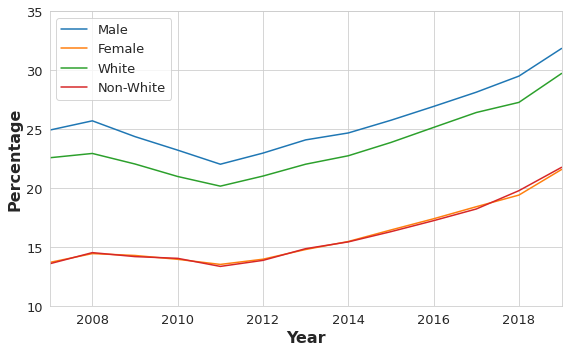

In [226]:
plt.figure(figsize=(8,5))
plt.plot(df['Year'],df['Male'],  label = "Male")
plt.plot(df['Year'],df['Female'], label = "Female")
plt.plot(df['Year'],df['White'],  label = "White")
plt.plot(df['Year'],df['Non-White'], label = "Non-White")
plt.xlabel('Year', fontsize=16,fontweight='bold')
plt.ylim(10,35)
plt.xlim(2007,2019)
# Set the y axis label of the current axis.
plt.ylabel('Percentage', fontsize=16,fontweight='bold')
# show a legend on the plot
plt.legend(fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
#plt.title('Proportion of people having income greater than 50K w.r.t. sex, race (eg. (#Male having income >50k)/(#Male))')
# Display a figure.
plt.savefig('ACS.ratio.pdf',bbox_inches='tight',dpi=400)